# Final Project Proposal

In [2]:
import pandas as pd 
import numpy as np
import requests
import tweepy
from bs4 import BeautifulSoup
import re
from selenium import webdriver
import matplotlib.pyplot as plt
import time
from random import randint
from fredapi import Fred

### What question/questions are you trying to solve?

What geographic areas are most at risk to the opioid crisis? How has sentiment surrounding the opioid crisis changed over time? 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6034970/

###### What are the outcomes you think you will find (could use mutually exclusive collectively exhaustive for this), and then so what?

###### How would someone, or some entity take action upon learning this?

###### What version this question would allow me to find an answer in 2-3 days?

###### What version of this question would allow me/motivate me to work on this problem even after completing Flatiron School?


In [3]:
df = pd.read_csv('data/raw_data.csv', skiprows=2)

In [4]:
df.head()

,Location,"Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)","Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)",Methadone,Heroin
0,United States,14495.0,28466,3194,15482
1,Alabama,141.0,198,30,125
2,Alaska,47.0,37,NSD,36
3,Arizona,349.0,267,83,334
4,Arkansas,116.0,68,17,15


In [5]:
df = df.iloc[0:52]

In [6]:
df.tail()

,Location,"Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)","Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)",Methadone,Heroin
47,Virginia,336.0,829,83,556
48,Washington,250.0,143,119,306
49,West Virginia,279.0,618,35,244
50,Wisconsin,318.0,466,58,414
51,Wyoming,30.0,17,NSD,NSD


In [7]:
df.isna().sum()

Location                                                             0
Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)      0
Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)    0
Methadone                                                            0
Heroin                                                               0
dtype: int64

In [8]:
df = df.drop([0])

In [9]:
df['Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)'] = df['Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)'].apply(lambda x: str(x))
df = df[df['Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)'] != 'NSD']
df['Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)'] = df['Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)'].apply(lambda x: float(x))

In [10]:
df['Methadone'] = df['Methadone'].apply(lambda x: str(x))
df = df[df['Methadone'] != 'NSD']
df['Methadone'] = df['Methadone'].apply(lambda x: float(x))

In [11]:
df.head()

,Location,"Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)","Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)",Methadone,Heroin
1,Alabama,141.0,198.0,30.0,125
3,Arizona,349.0,267.0,83.0,334
4,Arkansas,116.0,68.0,17.0,15
5,California,973.0,536.0,253.0,715
6,Colorado,254.0,112.0,58.0,224


In [12]:
df['Heroin'] = df['Heroin'].apply(lambda x: str(x))
df = df[df['Heroin'] != 'NSD']
df['Heroin'] = df['Heroin'].apply(lambda x: float(x))

In [13]:
df.nlargest(10, 'Heroin')

,Location,"Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)","Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)",Methadone,Heroin
33,New York,821.0,2238.0,283.0,1356.0
14,Illinois,494.0,1251.0,155.0,1187.0
31,New Jersey,424.0,1376.0,82.0,1085.0
36,Ohio,854.0,3523.0,106.0,1000.0
39,Pennsylvania,564.0,1982.0,64.0,819.0
23,Michigan,510.0,1368.0,148.0,783.0
5,California,973.0,536.0,253.0,715.0
10,Florida,1133.0,2126.0,175.0,707.0
44,Texas,535.0,348.0,129.0,569.0
47,Virginia,336.0,829.0,83.0,556.0


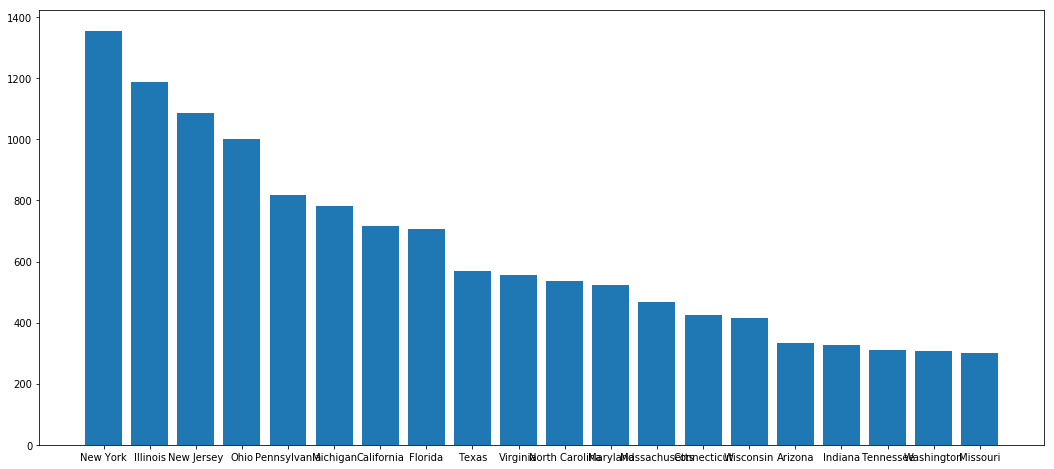

In [49]:
plt.figure(figsize=(18,8))
plt.bar(df.nlargest(20, 'Heroin')['Location'], df.nlargest(20, 'Heroin')['Heroin'])
plt.show()

In [15]:
plt.figure(figsize=(20,10))

bars1 = df.nlargest(10, 'Heroin')['Heroin']
bars2 = df.nlargest(10, 'Heroin')['Methadone']
bars3 = df.nlargest(10, 'Heroin')['Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)']
bars4 = df.nlargest(10, 'Heroin')['Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)']
 
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, width=barWidth, edgecolor='white', label='var2')
plt.bar(r4, bars4, width=barWidth, edgecolor='white', label='var2')

plt.xticks([r + barWidth for r in range(len(bars1))], ['New York', 'Illinois', 'New Jersey', 'Ohio', 'Pennsylvania', 'Michigan', 'California', 'Florida', 'Texas', 'Virginia'])

plt.show()

NameError: name 'r1' is not defined

<Figure size 1440x720 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,10))

bars1 = df.nsmallest(10, 'Heroin')['Heroin']
bars2 = df.nsmallest(10, 'Heroin')['Methadone']
bars3 = df.nsmallest(10, 'Heroin')['Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)']
bars4 = df.nsmallest(10, 'Heroin')['Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)']
 
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, width=barWidth, edgecolor='white', label='var2')
plt.bar(r4, bars4, width=barWidth, edgecolor='white', label='var2')

plt.xticks([r + barWidth for r in range(len(bars1))], ['New York', 'Illinois', 'New Jersey', 'Ohio', 'Pennsylvania', 'Michigan', 'California', 'Florida', 'Texas', 'Virginia'])

plt.show()

National v. local news sources 

In [186]:
def scrape_news_summaries(url):
    time.sleep(randint(0, 2))  # relax and don't let google be angry
    r = requests.get(url)
    print(r.status_code)  # Print the status code
    content = r.text
    news_summaries = []
    soup = BeautifulSoup(content, "html.parser")
    st_divs = soup.findAll("h3", {"class": "r"}) 
    for st_div in st_divs:
        news_summaries.append(st_div.text)
    return news_summaries


l = scrape_news_summaries("https://www.google.com/search?q=opioids&tbm=nws&ei=SFxLXNmsBfHF_Qbk6rTgCQ&start=0&sa=N&ved=0ahUKEwjZ8OvGzongAhXxYt8KHWQ1DZw4ChDy0wMIUQ&biw=1340&bih=703&dpr=1")
#l = scrape_news_summaries("""T-Notes""")
l

200


['We now have more proof that drug companies helped cause the ...',
 "FDA's opioids adviser accuses agency of having 'direct' link to crisis",
 'California Doctors Alarmed As State Links Their Opioid Prescriptions ...',
 'Alexandria warns of opioid danger after four overdose and two die',
 'Benzodiazepine Visits Have Doubled, Co-Prescription with Opioids ...',
 'Penn reduces opioid use after spine surgery',
 'The Importance Of Patient-Centric Opioid Prescribing Guidelines',
 'Opioids are killing more children and teens, too, study says',
 "Paxton: Texas ramping up fight against opioids with new 'Dose of ...",
 'County by county, researchers link opioid deaths to drugmakers ...']

In [2]:
non_med = pd.read_csv('non_med_use.csv')

In [3]:
non_med.head()

,STATEFP,COUNTYFP,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION,COUNTY
0,1,1,2014,nonmedpain,5.12,Alabama,AL,Autauga County
1,1,3,2014,nonmedpain,5.27,Alabama,AL,Baldwin County
2,1,5,2014,nonmedpain,5.27,Alabama,AL,Barbour County
3,1,7,2014,nonmedpain,5.62,Alabama,AL,Bibb County
4,1,9,2014,nonmedpain,5.62,Alabama,AL,Blount County


In [4]:
non_med.shape

(3220, 8)

In [19]:
drug_related_deaths = pd.read_csv('data/drug_related_deaths.csv')

In [20]:
drug_related_deaths.head()

,STATEFP,COUNTYFP,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION,COUNTY
0,1,99,2010,drugdeathrate,NaN,Alabama,AL,Monroe County
1,1,131,2010,drugdeathrate,NaN,Alabama,AL,Wilcox County
2,1,89,2010,drugdeathrate,10.5,Alabama,AL,Madison County
3,1,101,2010,drugdeathrate,NaN,Alabama,AL,Montgomery County
4,1,73,2010,drugdeathrate,9.1,Alabama,AL,Jefferson County


In [21]:
drug_related_deaths.shape

(25760, 8)

In [22]:
drug_dependency = pd.read_csv('data/drug_dependency.csv')

In [23]:
drug_dependency.head()

,STATEFP,COUNTYFP,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION,COUNTY
0,1,1,2014,drugdep,2.56,Alabama,AL,Autauga County
1,1,3,2014,drugdep,2.54,Alabama,AL,Baldwin County
2,1,5,2014,drugdep,2.54,Alabama,AL,Barbour County
3,1,7,2014,drugdep,2.58,Alabama,AL,Bibb County
4,1,9,2014,drugdep,2.58,Alabama,AL,Blount County


In [24]:
drug_dependency.shape

(3220, 8)

In [25]:
fentanyl = pd.read_csv('data/fentanyl_state_level.csv')

In [26]:
fentanyl.head()

,STATEFP,STATE,STATEABBREVIATION,YEAR,INDICATOR,VALUE
0,1,Alabama,AL,2016,fentanyl_seize,97.0
1,1,Alabama,AL,2015,fentanyl_seize,64.0
2,2,Alaska,AK,2016,fentanyl_seize,11.0
3,2,Alaska,AK,2015,fentanyl_seize,1.0
4,4,Arizona,AZ,2016,fentanyl_seize,78.0


In [27]:
fentanyl.shape

(106, 6)

In [28]:
non_med_pain = pd.read_csv('data/non_med_pain.csv')

In [29]:
non_med_pain.head()

,STATEFP,COUNTYFP,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION,COUNTY
0,1,1,2014,nonmedpain,5.12,Alabama,AL,Autauga County
1,1,3,2014,nonmedpain,5.27,Alabama,AL,Baldwin County
2,1,5,2014,nonmedpain,5.27,Alabama,AL,Barbour County
3,1,7,2014,nonmedpain,5.62,Alabama,AL,Bibb County
4,1,9,2014,nonmedpain,5.62,Alabama,AL,Blount County


In [30]:
non_med_pain.shape

(3220, 8)

In [31]:
need_treatment = pd.read_csv('data/need_treatment.csv')

In [32]:
need_treatment.head()

,STATEFP,COUNTYFP,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION,COUNTY
0,1,1,2014,pctunmetneed,95.70,Alabama,AL,Autauga County
1,1,3,2014,pctunmetneed,91.34,Alabama,AL,Baldwin County
2,1,5,2014,pctunmetneed,91.34,Alabama,AL,Barbour County
3,1,7,2014,pctunmetneed,91.86,Alabama,AL,Bibb County
4,1,9,2014,pctunmetneed,91.86,Alabama,AL,Blount County


In [33]:
need_treatment.shape

(3220, 8)

In [34]:
in_patient = pd.read_csv('data/inpatient_stays.csv')

In [35]:
in_patient.head()

,STATEFP,STATE,STATEABBREVIATION,YEAR,INDICATOR,VALUE
0,1,Alabama,AL,2005,op_rel_inpat,NaN
1,1,Alabama,AL,2006,op_rel_inpat,NaN
2,1,Alabama,AL,2007,op_rel_inpat,NaN
3,1,Alabama,AL,2008,op_rel_inpat,NaN
4,1,Alabama,AL,2009,op_rel_inpat,NaN


In [36]:
in_patient.shape

(583, 6)

In [37]:
emergency_stays = pd.read_csv('data/emergency_stays.csv')

In [38]:
emergency_stays.head()

,STATEFP,COUNTYFP,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION,COUNTY
0,1,1,2014,nonmedpain,5.12,Alabama,AL,Autauga County
1,1,3,2014,nonmedpain,5.27,Alabama,AL,Baldwin County
2,1,5,2014,nonmedpain,5.27,Alabama,AL,Barbour County
3,1,7,2014,nonmedpain,5.62,Alabama,AL,Bibb County
4,1,9,2014,nonmedpain,5.62,Alabama,AL,Blount County


In [39]:
emergency_stays.shape

(3220, 8)

In [40]:
part_d_supply = pd.read_csv('data/part_d_supply.csv')

In [41]:
part_d_supply.head()

,STATEFP,STATE,STATEABBREVIATION,YEAR,INDICATOR,VALUE
0,1,Alabama,AL,2005,op_rel_ed,NaN
1,1,Alabama,AL,2006,op_rel_ed,NaN
2,1,Alabama,AL,2007,op_rel_ed,NaN
3,1,Alabama,AL,2008,op_rel_ed,NaN
4,1,Alabama,AL,2009,op_rel_ed,NaN


In [42]:
part_d_supply.shape

(583, 6)

In [43]:
prescriptions = pd.read_csv('data/prescriptions.csv')

In [44]:
prescriptions.head()

,STATEFP,COUNTYFP,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION,COUNTY
0,1,1,2015,partD30dayrxrate,2.34,Alabama,AL,Autauga County
1,1,3,2015,partD30dayrxrate,2.56,Alabama,AL,Baldwin County
2,1,5,2015,partD30dayrxrate,1.46,Alabama,AL,Barbour County
3,1,7,2015,partD30dayrxrate,0.39,Alabama,AL,Bibb County
4,1,9,2015,partD30dayrxrate,1.22,Alabama,AL,Blount County


In [56]:
prescriptions.shape

(3220, 8)

In [57]:
prescriptions.isna().sum()

STATEFP               0
COUNTYFP              0
YEAR                  0
INDICATOR             0
VALUE                97
STATE                 0
STATEABBREVIATION     0
COUNTY                0
dtype: int64

In [4]:
x = pd.read_csv('merged_data.csv')

In [8]:
x['index'][0:10].tolist()

['Autauga County, AL',
 'Baldwin County, AL',
 'Barbour County, AL',
 'Bibb County, AL',
 'Blount County, AL',
 'Bullock County, AL',
 'Butler County, AL',
 'Calhoun County, AL',
 'Chambers County, AL',
 'Cherokee County, AL']

In [9]:
x

,Unnamed: 0,index,population,rate_avg,prescriptions_per_100,uninsured_2015,uninsured_2016,uninsured_2017,population_estimate,Pop <5,...,median_student_loan_debt,share_with_auto_debt,share_with_auto_or_retail_debt,auto_retail_debt_delinquency_rate,Medicinal,Decriminalized,State Laws,Republican/lean Rep.,No lean,Democrat/lean Dem.
0,0,"Autauga County, AL","55,416",10.95,129.600000,0.128,0.134,0.110,55049.0,5.8,...,19441,0.27,0.35,0.09,No,No,View State Laws,52%,13%,35%
1,1,"Baldwin County, AL","208,563",20.95,123.800000,0.158,0.175,0.161,199510.0,5.7,...,13964,0.33,0.39,0.05,No,No,View State Laws,52%,13%,35%
2,2,"Barbour County, AL","25,965",6.95,92.700000,0.175,0.174,0.153,26614.0,5.5,...,n/a*,0.26,0.38,0.19,No,No,View State Laws,52%,13%,35%
3,3,"Bibb County, AL","22,643",16.95,97.200000,0.151,0.150,0.136,22572.0,5.1,...,n/a*,0.31,0.4,0.12,No,No,View State Laws,52%,13%,35%
4,4,"Blount County, AL","57,704",16.95,56.900000,0.183,0.176,0.165,57704.0,6.1,...,11128,0.28,0.37,0.07,No,No,View State Laws,52%,13%,35%
5,5,"Bullock County, AL","10,362",10.95,19.800000,0.176,0.185,0.173,10552.0,6.0,...,n/a*,0.26,0.36,0.17,No,No,View State Laws,52%,13%,35%
6,6,"Butler County, AL","19,998",10.95,135.400000,0.166,0.155,0.144,20280.0,6.0,...,n/a*,0.23,0.34,0.17,No,No,View State Laws,52%,13%,35%
7,7,"Calhoun County, AL","114,611",12.95,161.000000,0.153,0.160,0.142,115883.0,5.6,...,17213,0.28,0.36,0.1,No,No,View State Laws,52%,13%,35%
8,8,"Chambers County, AL","33,843",12.95,140.600000,0.160,0.168,0.149,34018.0,6.0,...,15535,0.24,0.33,0.15,No,No,View State Laws,52%,13%,35%
9,9,"Cherokee County, AL","25,725",16.95,157.700000,0.167,0.164,0.146,25897.0,4.9,...,n/a*,0.26,0.38,0.09,No,No,View State Laws,52%,13%,35%
